# Project: Investigate TMDB Movies Data
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This Dataset track  thousands movies and inlcude several information like movie names, crew ,genre, director, budget and revenue along with other useful infomration to perfrom data analysis on the supplied movies.

The following questions can be answered from this data set.

- Which Genre has been produced the most? and how does it compare to other genres ?
- How the number of produced filmes changed over the years?
- Which actor has the most succesful movies during this period?
- Which actor has starred in movies over 100M  in revenue? and how many ?
- Which factors are assocciated with high revenue movies?

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
# load the data from the CSV file
df = pd.read_csv('tmdb-movies.csv')

# Initial exploration of the data
df.head()

id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   

                                            homepage          director  \
0                      http://www.jurassicworld.com/   Colin Trevorrow   
1                        http://www.madmaxmovie.com/     George Miller   
2     http://www.thedivergentseries.movie/#insurgent  Robert Schwentke   
3  http://www.starwars.com/films/star-wars-episod...       J.J. Abrams   
4                           http://www.furious7.com/         James Wan   

                         tagline      ...       \
0              The park is open.      ...        
1             What a Lovely Day.      ...        
2     One Choice Can Destroy You      ...        
3  Every generation has a story.      ...        
4            Vengeance Hits Home      ...        

                                            overview runtime  \
0  Twenty-two years after the events of Jurassic ...     124   
1  An apocalyptic story set in the furthest reach...     120   
2  Beatrice Prior must confront her inner demons ...     119   
3  Thirty years after defeating the Galactic Empi...     136   
4  Deckard Shaw seeks revenge against Dominic Tor...     137   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   
2         Adventure|Science Fiction|Thriller   
3   Action|Adventure|Science Fiction|Fantasy   
4                      Action|Crime|Thriller   

                                production_companies release_date vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15       5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...      5/13/15       6185   
2  Summit Entertainment|Mandeville Films|Red Wago...      3/18/15       2480   
3          Lucasfilm|Truenorth Productions|Bad Robot     12/15/15       5292   
4  Universal Pictures|Original Film|Media Rights ...       4/1/15       2947   

   vote_average  release_year    budget_adj   revenue_adj  
0           6.5          2015  1.379999e+08  1.392446e+09  
1           7.1          2015  1.379999e+08  3.481613e+08  
2           6.3          2015  1.012000e+08  2.716190e+08  
3           7.5          2015  1.839999e+08  1.902723e+09  
4           7.3          2015  1.747999e+08  1.385749e+09  

[5 rows x 21 columns]

In [3]:
# Understanding the size of the data
df.shape

(10866, 21)

In [4]:
# Understanding the datatypes for the different coloumns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [5]:
# Getting exact count of all rows with missing data
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

### Dropping unneeded Data

In [6]:
# drop unneded coloumns not used in the analysis
df.drop(['homepage','tagline','keywords','overview','id','imdb_id'],axis=1,inplace=True)
df.head(1)

popularity     budget     revenue  original_title  \
0   32.985763  150000000  1513528810  Jurassic World   

                                                cast         director  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...  Colin Trevorrow   

   runtime                                     genres  \
0      124  Action|Adventure|Science Fiction|Thriller   

                                production_companies release_date  vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15        5562   

   vote_average  release_year    budget_adj   revenue_adj  
0           6.5          2015  1.379999e+08  1.392446e+09

In [7]:
# Getting exact count of all rows with missing data
df.isnull().sum()

popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [8]:
# Find if there is any duplicated entry in the data
df.duplicated().sum()

1

In [9]:
# Get the exact item which is duplicated
df[df.duplicated()]

popularity    budget  revenue original_title  \
2090     0.59643  30000000   967000         TEKKEN   

                                                   cast          director  \
2090  Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...  Dwight H. Little   

      runtime                                       genres  \
2090       92  Crime|Drama|Action|Thriller|Science Fiction   

        production_companies release_date  vote_count  vote_average  \
2090  Namco|Light Song Films      3/20/10         110           5.0   

      release_year  budget_adj  revenue_adj  
2090          2010  30000000.0     967000.0

In [10]:
# Validate the size of the Data before remove duplicates
df.shape

(10866, 15)

In [11]:
# Drop the Duplicated entries
df.drop_duplicates(inplace=True)

In [12]:
# Validate the impact of the change
df.shape

(10865, 15)

In [13]:
# Since we will be preforming operations on genres and cast we need to drop all rows with NaN
# in these two rows
df.dropna(subset=['genres','cast'],inplace=True)

In [14]:
df.isnull().sum()

popularity                0
budget                    0
revenue                   0
original_title            0
cast                      0
director                 36
runtime                   0
genres                    0
production_companies    976
release_date              0
vote_count                0
vote_average              0
release_year              0
budget_adj                0
revenue_adj               0
dtype: int64

In [15]:
# change all NaN in director and production_companies to empty strings
df['director'].fillna('',inplace=True)
df['production_companies'].fillna('',inplace=True)

In [16]:
df.isnull().sum()

popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

In [17]:
# We will use only revenue and budject adjusted
# So we will drop budget and revenue
df.drop(['budget','revenue'],axis=1,inplace=True)

In [18]:
df.head()

popularity                original_title  \
0   32.985763                Jurassic World   
1   28.419936            Mad Max: Fury Road   
2   13.112507                     Insurgent   
3   11.173104  Star Wars: The Force Awakens   
4    9.335014                     Furious 7   

                                                cast          director  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   Colin Trevorrow   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...     George Miller   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...  Robert Schwentke   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...       J.J. Abrams   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...         James Wan   

   runtime                                     genres  \
0      124  Action|Adventure|Science Fiction|Thriller   
1      120  Action|Adventure|Science Fiction|Thriller   
2      119         Adventure|Science Fiction|Thriller   
3      136   Action|Adventure|Science Fiction|Fantasy   
4      137                      Action|Crime|Thriller   

                                production_companies release_date  vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15        5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...      5/13/15        6185   
2  Summit Entertainment|Mandeville Films|Red Wago...      3/18/15        2480   
3          Lucasfilm|Truenorth Productions|Bad Robot     12/15/15        5292   
4  Universal Pictures|Original Film|Media Rights ...       4/1/15        2947   

   vote_average  release_year    budget_adj   revenue_adj  
0           6.5          2015  1.379999e+08  1.392446e+09  
1           7.1          2015  1.379999e+08  3.481613e+08  
2           6.3          2015  1.012000e+08  2.716190e+08  
3           7.5          2015  1.839999e+08  1.902723e+09  
4           7.3          2015  1.747999e+08  1.385749e+09

In [19]:
# The release_date need to be changed to datetime object instead of string
df.release_date = pd.to_datetime(df.release_date,format='%m/%d/%y')

In [20]:
# validate that the release_date column has changes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10767 entries, 0 to 10865
Data columns (total 13 columns):
popularity              10767 non-null float64
original_title          10767 non-null object
cast                    10767 non-null object
director                10767 non-null object
runtime                 10767 non-null int64
genres                  10767 non-null object
production_companies    10767 non-null object
release_date            10767 non-null datetime64[ns]
vote_count              10767 non-null int64
vote_average            10767 non-null float64
release_year            10767 non-null int64
budget_adj              10767 non-null float64
revenue_adj             10767 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(3), object(5)
memory usage: 1.2+ MB


In [21]:
# Add new feature which is season to help improve the analysis
# Using the release date field

# define a function to get get the season from the input date
def get_season(month):
    '''
    This fuction will take the month and return the Movie Season
    corresponding to this month
    ex:
     5 >> summer -- May
     1 >> winter -- January
    '''
    month_to_season = {'summer':[5,6,7,8,9],
                       'fall':[10],
                       'winter': [1,2],
                      'spring': [3,4],
                      'christmas': [11,12]}
    for k,v in month_to_season.items():
        if month in v:
            return k
    else: return 'N/A'
        
df['season'] = df.release_date.dt.month.apply(get_season)

In [22]:
# verify the correct classification
df['season'].value_counts()

summer       4657
christmas    1781
spring       1606
winter       1582
fall         1141
Name: season, dtype: int64

In [23]:
# Initial exploration for the different statistcis in this data
df.describe()

popularity       runtime    vote_count  vote_average  release_year  \
count  10767.000000  10767.000000  10767.000000  10767.000000  10767.000000   
mean       0.650924    102.413393    219.137364      5.967549   2001.283459   
std        1.003565     30.906009    577.964702      0.931426     12.815909   
min        0.000065      0.000000     10.000000      1.500000   1960.000000   
25%        0.209957     90.000000     17.000000      5.400000   1995.000000   
50%        0.386062     99.000000     39.000000      6.000000   2006.000000   
75%        0.719253    112.000000    147.000000      6.600000   2011.000000   
max       32.985763    900.000000   9767.000000      9.200000   2015.000000   

         budget_adj   revenue_adj  
count  1.076700e+04  1.076700e+04  
mean   1.770705e+07  5.183338e+07  
std    3.442339e+07  1.452125e+08  
min    0.000000e+00  0.000000e+00  
25%    0.000000e+00  0.000000e+00  
50%    0.000000e+00  0.000000e+00  
75%    2.103337e+07  3.432264e+07  
max    4.250000e+08  2.827124e+09

In [24]:
df_test = df.copy()

In [25]:
df_test[df.budget_adj == df.budget_adj.max()]

popularity     original_title  \
2244     0.25054  The Warrior's Way   

                                                   cast    director  runtime  \
2244  Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...  Sngmoo Lee      100   

                                         genres      production_companies  \
2244  Adventure|Fantasy|Action|Western|Thriller  Boram Entertainment Inc.   

     release_date  vote_count  vote_average  release_year   budget_adj  \
2244   2010-12-02          74           6.4          2010  425000000.0   

      revenue_adj     season  
2244   11087569.0  christmas

In [26]:
#from the above output seems that around 50% of the samples has 0 in the budget and revenue so we need
# to remove all rows with 0 in both budget and revenue
df = df[df.revenue_adj != 0.0]
df = df[df.budget_adj != 0.0]

In [27]:
# get the summary statistics again
df.describe()

popularity      runtime   vote_count  vote_average  release_year  \
count  3850.000000  3850.000000  3850.000000   3850.000000   3850.000000   
mean      1.192661   109.228831   528.252727      6.168597   2001.260000   
std       1.475527    19.924053   880.258758      0.794616     11.284699   
min       0.001117    15.000000    10.000000      2.200000   1960.000000   
25%       0.463201    95.250000    71.000000      5.700000   1995.000000   
50%       0.798343   106.000000   204.500000      6.200000   2004.000000   
75%       1.372826   119.000000   580.750000      6.700000   2010.000000   
max      32.985763   338.000000  9767.000000      8.400000   2015.000000   

         budget_adj   revenue_adj  
count  3.850000e+03  3.850000e+03  
mean   4.428320e+07  1.371986e+08  
std    4.481243e+07  2.161832e+08  
min    9.693980e-01  2.370705e+00  
25%    1.314346e+07  1.841498e+07  
50%    3.004524e+07  6.179073e+07  
75%    6.072867e+07  1.633775e+08  
max    4.250000e+08  2.827124e+09

In [28]:
# Adding New Features to help in the analysis

# Adding Movie Star as a new feature
df['movie_star'] = df['cast'].apply(lambda x: x.split('|')[0])

# Adding Main genre as a new feature
df['genre'] = df['genres'].apply(lambda x: x.split('|')[0])

# Adding production_studio as a new feature
df['studio'] = df['production_companies'].apply(lambda x: x.split('|')[0])

# Adding Net revenue
df['net_revenue'] = df.apply(lambda row: row.revenue_adj - row.budget_adj,axis=1)

df.head()

popularity                original_title  \
0   32.985763                Jurassic World   
1   28.419936            Mad Max: Fury Road   
2   13.112507                     Insurgent   
3   11.173104  Star Wars: The Force Awakens   
4    9.335014                     Furious 7   

                                                cast          director  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   Colin Trevorrow   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...     George Miller   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...  Robert Schwentke   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...       J.J. Abrams   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...         James Wan   

   runtime                                     genres  \
0      124  Action|Adventure|Science Fiction|Thriller   
1      120  Action|Adventure|Science Fiction|Thriller   
2      119         Adventure|Science Fiction|Thriller   
3      136   Action|Adventure|Science Fiction|Fantasy   
4      137                      Action|Crime|Thriller   

                                production_companies release_date  vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...   2015-06-09        5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...   2015-05-13        6185   
2  Summit Entertainment|Mandeville Films|Red Wago...   2015-03-18        2480   
3          Lucasfilm|Truenorth Productions|Bad Robot   2015-12-15        5292   
4  Universal Pictures|Original Film|Media Rights ...   2015-04-01        2947   

   vote_average  release_year    budget_adj   revenue_adj     season  \
0           6.5          2015  1.379999e+08  1.392446e+09     summer   
1           7.1          2015  1.379999e+08  3.481613e+08     summer   
2           6.3          2015  1.012000e+08  2.716190e+08     spring   
3           7.5          2015  1.839999e+08  1.902723e+09  christmas   
4           7.3          2015  1.747999e+08  1.385749e+09     spring   

         movie_star      genre                     studio   net_revenue  
0       Chris Pratt     Action          Universal Studios  1.254446e+09  
1         Tom Hardy     Action  Village Roadshow Pictures  2.101614e+08  
2  Shailene Woodley  Adventure       Summit Entertainment  1.704191e+08  
3     Harrison Ford     Action                  Lucasfilm  1.718723e+09  
4        Vin Diesel     Action         Universal Pictures  1.210949e+09

<a id='eda'></a>
## Exploratory Data Analysis

## ** Which Genre has been produced the most? and how it compare to others

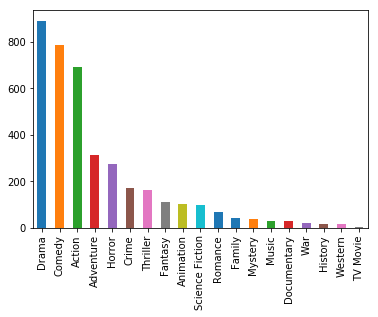

In [96]:
# Plotting the genre data to understand its distribution
df.genre.value_counts().plot(kind='bar');

##### From the Above graph we can see that the Drama movies are the most produced movies in this period

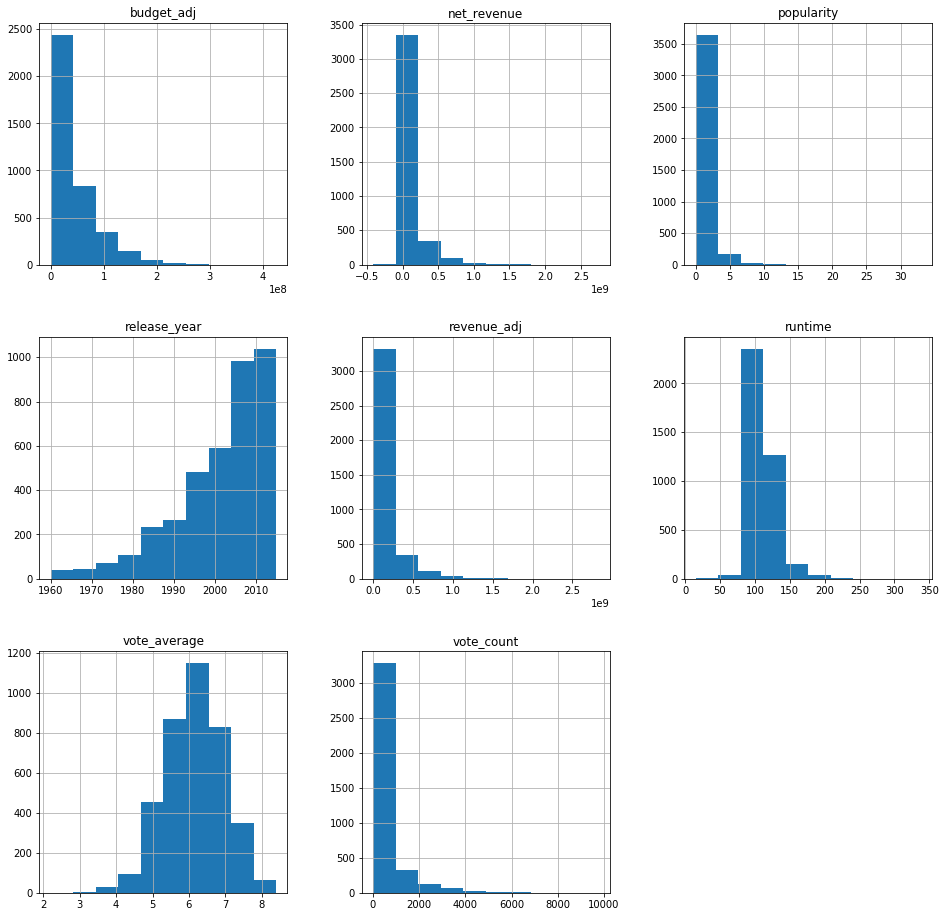

In [30]:
# getting the distribution of the different variables in the data set
df.hist(figsize=(16,16));

## ** How the number of produced filmes changed over the years?

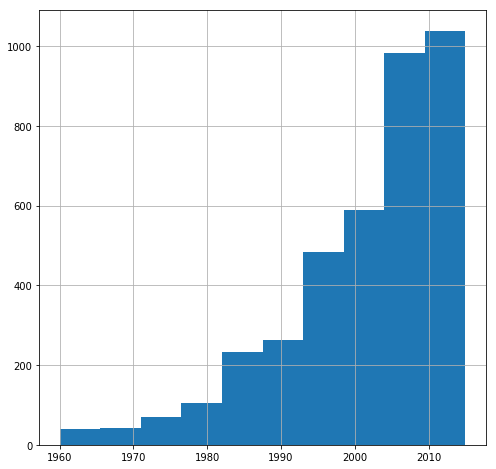

In [31]:
# The number of movies produced each year
df.release_year.hist(figsize=(8,8));

#### The above graph outlines that the number of movies released increased significantly between 1960 and 2010

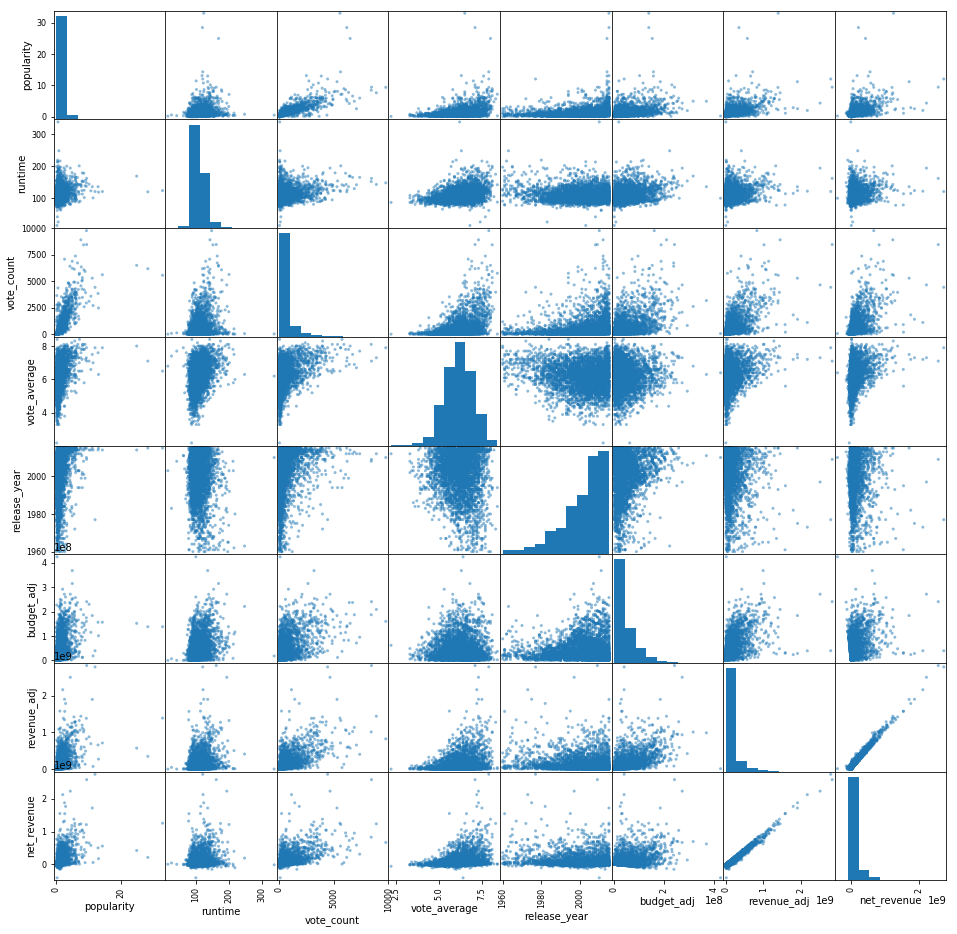

In [32]:
# quick exploration for the coreelation between the different features in this dataset
pd.plotting.scatter_matrix(df,figsize=(16,16));

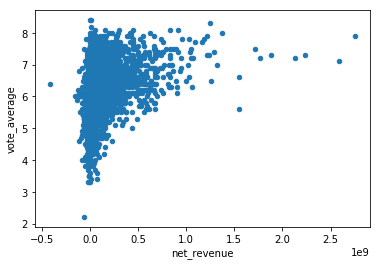

In [88]:
# What is the relation between the average_vote and net revenue for a movie
df.plot(x='net_revenue',y='vote_average',kind='scatter');

In [ ]:
# get all moview with net_revenue > 100 Million dollars
df_100M = df[df.net_revenue >= 100e6]

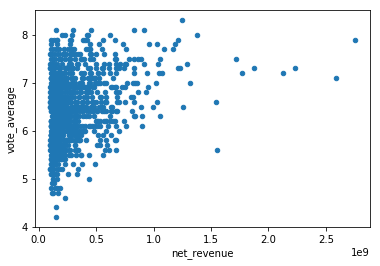

In [89]:
df_100M.plot(y='vote_average',x='net_revenue',kind='scatter');

In [90]:
df_100M.describe()

popularity      runtime   vote_count  vote_average  release_year  \
count  1015.000000  1015.000000  1015.000000   1015.000000   1015.000000   
mean      2.185356   116.009852  1238.397044      6.489754   1999.204926   
std       2.296219    22.492074  1336.165820      0.701501     12.896928   
min       0.131526    69.000000    13.000000      4.200000   1960.000000   
25%       1.011328    99.000000   339.500000      6.000000   1992.000000   
50%       1.585785   113.000000   740.000000      6.500000   2002.000000   
75%       2.604719   129.000000  1667.000000      7.000000   2010.000000   
max      32.985763   248.000000  9767.000000      8.300000   2015.000000   

         budget_adj   revenue_adj   net_revenue  
count  1.015000e+03  1.015000e+03  1.015000e+03  
mean   7.620954e+07  3.856790e+08  3.094695e+08  
std    5.642973e+07  2.957708e+08  2.750035e+08  
min    2.248029e+02  1.044501e+08  1.000795e+08  
25%    3.167809e+07  1.992981e+08  1.390315e+08  
50%    6.284215e+07  2.915161e+08  2.121480e+08  
75%    1.083227e+08  4.674433e+08  3.731911e+08  
max    3.683713e+08  2.827124e+09  2.750137e+09

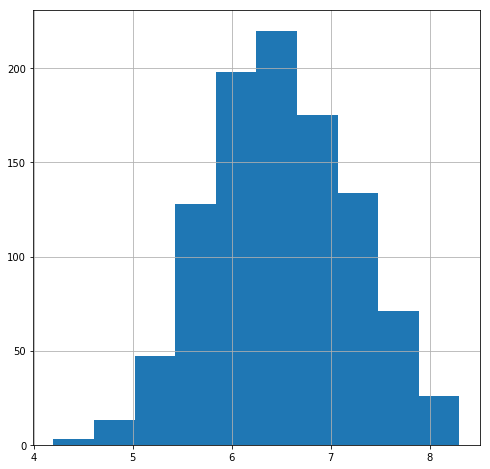

In [91]:
df_100M.vote_average.hist(figsize=(8,8));

#### Movies with over 100 Millions in Revenue has an average vote of 6.5

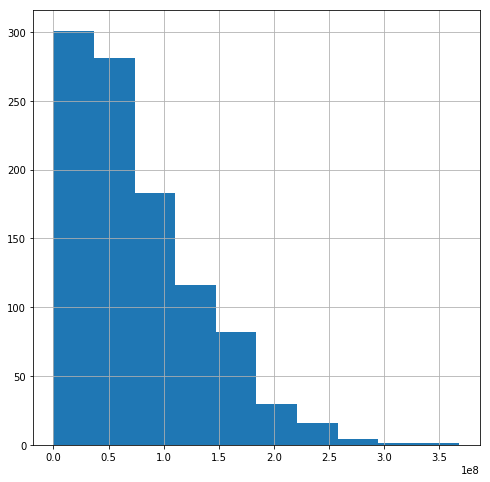

In [94]:
df_100M.budget_adj.hist(figsize=(8,8));

#### Movies with over 100 Millions in Revenue has an average production budjet of 76 Million dollars

In [98]:
# What are the genre distribution for the succsful movies
df_100M.genre.value_counts()

Action             202
Comedy             183
Drama              164
Adventure          146
Animation           60
Horror              47
Fantasy             42
Science Fiction     40
Crime               39
Thriller            30
Family              18
Romance             17
Music                9
History              6
War                  4
Mystery              4
Western              3
Documentary          1
Name: genre, dtype: int64

Text(0.5,1,'Genre distribution for Movies with over 100M revenue')

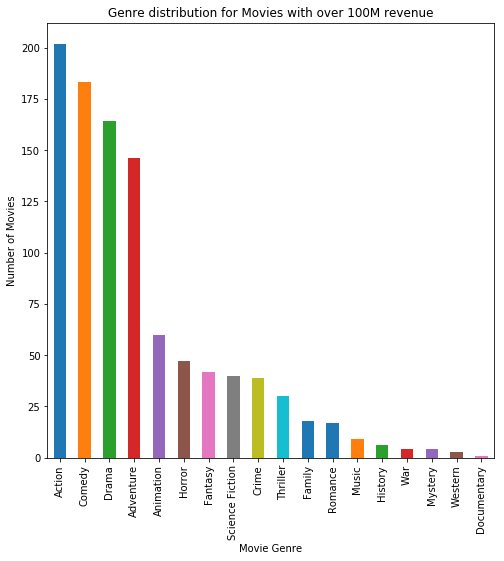

In [106]:
# plotting the genre distribution for the successful movies
df_100M.genre.value_counts().plot(kind='bar',figsize=(8,8));
plt.xlabel('Movie Genre')
plt.ylabel('Number of Movies')
plt.title('Genre distribution for Movies with over 100M revenue')

In [107]:
df_100M.season.value_counts()

summer       489
christmas    263
spring       109
fall          80
winter        74
Name: season, dtype: int64

In [110]:
df_100M.season.value_counts().plot(kind='bar',figsize=(8,8));
plt.xlabel('Movie Season')
plt.ylabel('Number of Movies')
plt.title('Movie Season distribution for Movies with over 100M revenue')

Text(0.5,1,'Movie Season distribution for Movies with over 100M revenue')

## Conclusions

## Which actor has starred in movies over 100M  in revenue? and how many ?

In [111]:
df_star = df_100M.groupby('movie_star')

In [113]:
df_star_count = df_star['genre'].count().sort_values(ascending=False).head(10)

Text(0.5,1,'Number of 100M Movies for super stars')

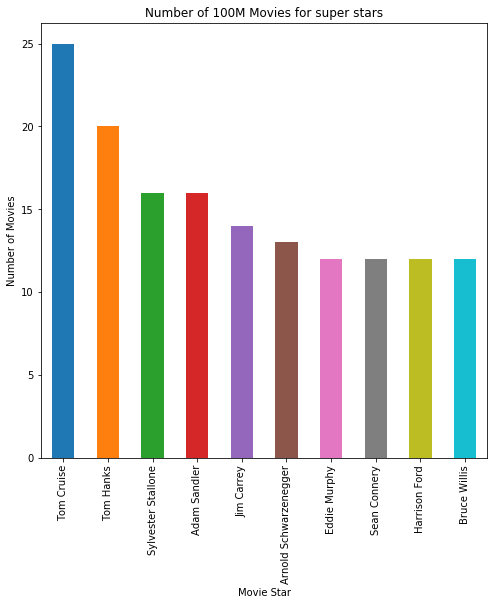

In [116]:
df_star_count.plot(kind='bar',figsize=(8,8));
plt.xlabel('Movie Star')
plt.ylabel('Number of Movies')
plt.title('Number of 100M Movies for super stars')

In [120]:
# Since the two seasons with 100M moview are Summer and chrismas
# we need to understand more which genre is most dominant in each season
df_season = df_100M.groupby('season')

In [118]:
df_season.get_group('summer')['genre'].value_counts()

Action             116
Comedy              84
Drama               67
Adventure           66
Animation           31
Fantasy             24
Horror              21
Science Fiction     21
Crime               19
Thriller            15
Romance              6
Music                5
Family               5
Mystery              3
History              3
War                  1
Western              1
Documentary          1
Name: genre, dtype: int64

In [121]:
df_summer_genre = df_season.get_group('summer')['genre'].value_counts()

Text(0.5,1,'Number of 100M Movies in Summer')

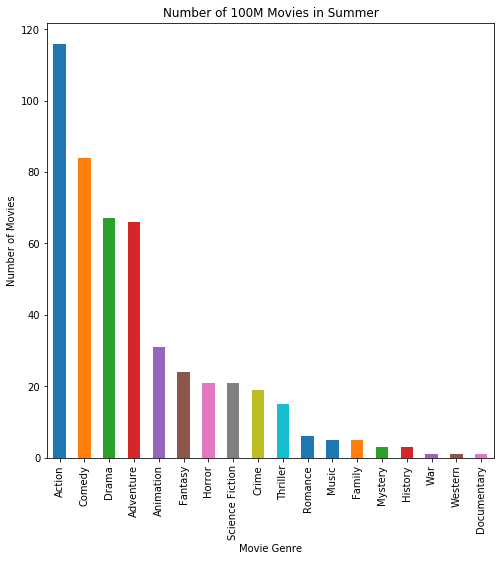

In [122]:
df_summer_genre.plot(kind='bar',figsize=(8,8));
plt.xlabel('Movie Genre')
plt.ylabel('Number of Movies')
plt.title('Number of 100M Movies in Summer')

In [123]:
# group the 100M Movies by both season and Genre
df_action_summer = df_100M.groupby(['season','genre'])

In [140]:
# For the Summer Action Movies what are the discriptive statistics for this group
df_action_summer.get_group(('summer','Action')).describe()

popularity     runtime   vote_count  vote_average  release_year  \
count  116.000000  116.000000   116.000000    116.000000    116.000000   
mean     2.932751  118.784483  1770.448276      6.347414   2001.844828   
std      4.229670   18.254151  1687.396221      0.661285     11.059211   
min      0.131526   84.000000    19.000000      4.400000   1965.000000   
25%      1.124745  106.000000   478.250000      5.975000   1995.000000   
50%      2.050832  117.500000  1275.000000      6.350000   2003.000000   
75%      3.405789  131.000000  2375.750000      6.700000   2012.000000   
max     32.985763  177.000000  9767.000000      7.900000   2015.000000   

         budget_adj   revenue_adj   net_revenue  
count  1.160000e+02  1.160000e+02  1.160000e+02  
mean   1.102835e+08  4.145183e+08  3.042348e+08  
std    5.256280e+07  2.225275e+08  2.000220e+08  
min    2.398191e+07  1.391837e+08  1.018141e+08  
25%    7.243885e+07  2.624878e+08  1.685125e+08  
50%    1.085776e+08  3.447318e+08  2.413480e+08  
75%    1.450377e+08  5.155683e+08  3.812802e+08  
max    2.374361e+08  1.392446e+09  1.254446e+09